**Вопросы**



Рассмотрим основые метрики:
1.  Accuracy (Достоверность)


$$
Accuracy = \frac{TP + TN}{TP + FP + TN + FN}
$$

Показывает долю правильных ответов модели, т.е. число правильных делится на число всех.
Она простая и понятная, но ее главный недостаток в том, что она плохо работает при сильно неравном количестве обьектов в классах. Например, если модель будет определять какие-либо редкие данные, например, болезнь, то не факт, что модель, которая будет определять TP и TN чаще будет лучше. Метрика может быть выше у более плохой модели.

Пример:
Пусть у нас выборка из 300 человек, из которой 20 болеют, а 280 здоровы(очевидная неравномерность классов).

Например, "хорошая" модель угадала 75% больных людей - 15 человек из 20 и почти 90(!) процентов не больных людей - 250 из 280. Посчитаем для нее метрику:
$$
\frac{15 + 250}{300} = 0.88(3)
$$

Эта, казалось бы, неплохая метрика проигрывает такой простей модели, как такой, которая будет указывать всех людей как здоровых:
$$
\frac{0 + 280}{300} = 0.9(3)
$$

Умная модель по метрике оказалась хуже одного и того же предсказания для всех людей.

2.   Precision (Точность)
$$
Precision = \frac{TP}{TP + FP}
$$

Показывает долю угаданных правильно положительных результатов. Заметим, что чем выше метрика, тем меньше FP, то есть ложноположительный результат - ошибка первого рода.

Используется в случаях, когда нам важнее всего допустить минимальное число ложных срабатываний. Например, если мы в случае болезни сразу начнем лечить пациента дорогостоящими лекарствами.

3.  Recall (Полнота)
$$
Recall = \frac{TP}{TP + FN}
$$

Показывает способность модели обнаруживать класс 1. Чем метрика ближе к 1, тем меньше вероятность допустить ошибку второго рода.

Используется в случаях, когда нужно найти максимальное количество обьектов класса 1, например, в случае болезни, угрожающей жизни пациента.

4. F1-Score (F1-мера)
$$
F1 = 2 * \frac{Precision * Recall}{Precision + Recall}
$$

Частный случай Fb-меры при равном вкладе Precision и Recall в метрику. Является средним гармоническим для этих двух метрик.

Использование такой метрики удобно тем, что если хоть одна из метрик Precision, Recall будет близка к 0, то и F1-Score будет близка к 0.

Будет использоваться, например, если нужно найти как можно больше больных пациентов ввиду угрозе их жизни, но в то же время их нужно начать сразу лечить дорогостоящими препаратами, так что необходимо в то же время минимизировать ложноположительные срабатывания.



Тестовый набор данных - это набор данных, не пересекающийся с тем, на котором была обучена модель, предназначенный для финальной оценки качества модели, после подбора гиперпараметров.

Параметры модели - это величины, изменяющиеся в процессе обучения модели, на которые мы не влияем извне. Например, весовые коэффициенты линейной регрессии.

Гиперпараметры модели - это такие характеристики модели, которые мы сами указываем до ее обучения и от которых само обучение может зависеть. Например, гиперпараметром линейной регрессии будет являться коэффициент регуляризации.

**Сореванование**

Посмотрим на данные, типы данных, обработаем пропуски и удалим ненужные столбцы.

In [ ]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_test = pd.read_csv('drive/MyDrive/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data1 = data.drop('Name', axis=1)
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data1 = data1.dropna(subset='Embarked')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
data1['Age'].fillna(data1['Age'].mean(), inplace=True)

In [ ]:
data1.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
data1 = data1.drop('Cabin', axis=1)
data1 = data1.drop('Ticket', axis=1)
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data1.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [ ]:
data1 = pd.get_dummies(data1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_female   889 non-null    bool   
 8   Sex_male     889 non-null    bool   
 9   Embarked_C   889 non-null    bool   
 10  Embarked_Q   889 non-null    bool   
 11  Embarked_S   889 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 59.9 KB


In [ ]:
data1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005028,-0.035330,0.030335,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.030335,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780,-0.089339,0.089339,0.033796,-0.013416,-0.021166
SibSp,-0.057686,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
Sex_female,-0.043136,0.541585,-0.127741,-0.089339,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,0.043136,-0.541585,0.127741,0.089339,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,-0.001208,0.169966,-0.245733,0.033796,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [ ]:
X = data1.drop('Survived', axis=1)
y = data1['Survived']

In [ ]:
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=3,
    max_features='sqrt',
    random_state=42
)

In [ ]:
#Обучаем модель
rf_clf_2d.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=500,
                       random_state=42)

In [ ]:
data2 = data_test.drop('Name', axis=1)
data2 = data2.drop('Cabin', axis=1)
data2 = data2.drop('Ticket', axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
data2 = pd.get_dummies(data2)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Sex_female   418 non-null    bool   
 7   Sex_male     418 non-null    bool   
 8   Embarked_C   418 non-null    bool   
 9   Embarked_Q   418 non-null    bool   
 10  Embarked_S   418 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 21.8 KB


In [ ]:
X1 = data2

#Делаем предсказание класса
y_pred = rf_clf_2d.predict(X1)
#Выводим отчёт о метриках
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,1
2,0
3,0
4,1


In [ ]:
data2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
id = pd.DataFrame(data2['PassengerId'])
id


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
ans = id.join(y_pred)

In [ ]:
ans.columns = ['PassengerId', 'Survived']
ans

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
ans.to_csv('drive/MyDrive/predict.csv', index=False)

Итоги: получили значение метрики 0,77: 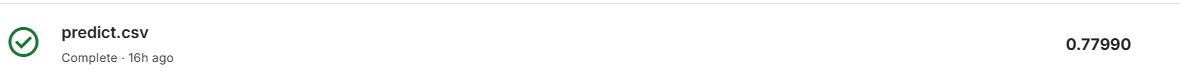